<a href="https://colab.research.google.com/github/Bduz/LSTM_encoder_decoder/blob/master/code/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Bduz/LSTM_encoder_decoder.git

Cloning into 'LSTM_encoder_decoder'...
remote: Enumerating objects: 523, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 523 (delta 12), reused 8 (delta 8), pack-reused 503 (from 1)
Receiving objects: 100% (523/523), 7.74 MiB | 24.22 MiB/s, done.
Resolving deltas: 100% (258/258), done.


In [3]:
import sys
sys.path.insert(0, '/content/LSTM_encoder_decoder/code/')

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from importlib import reload
import sys

import generate_dataset
import lstm_encoder_decoder
import plotting
#matplotlib.rcParams.update({'font.size': 17})

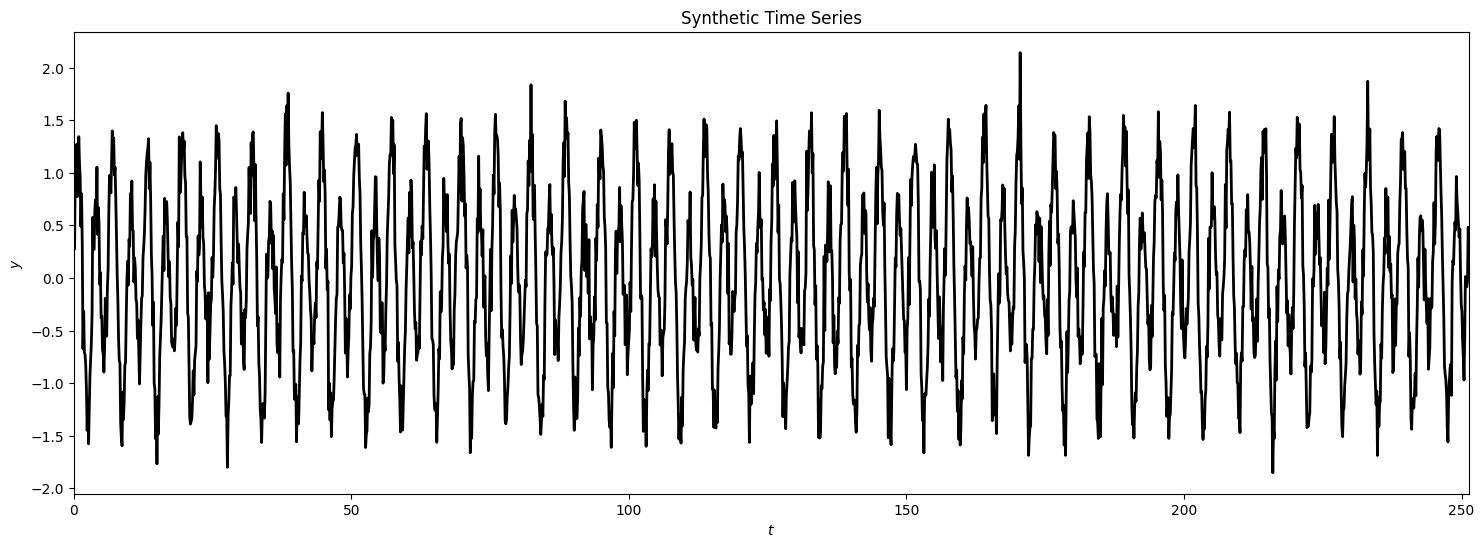

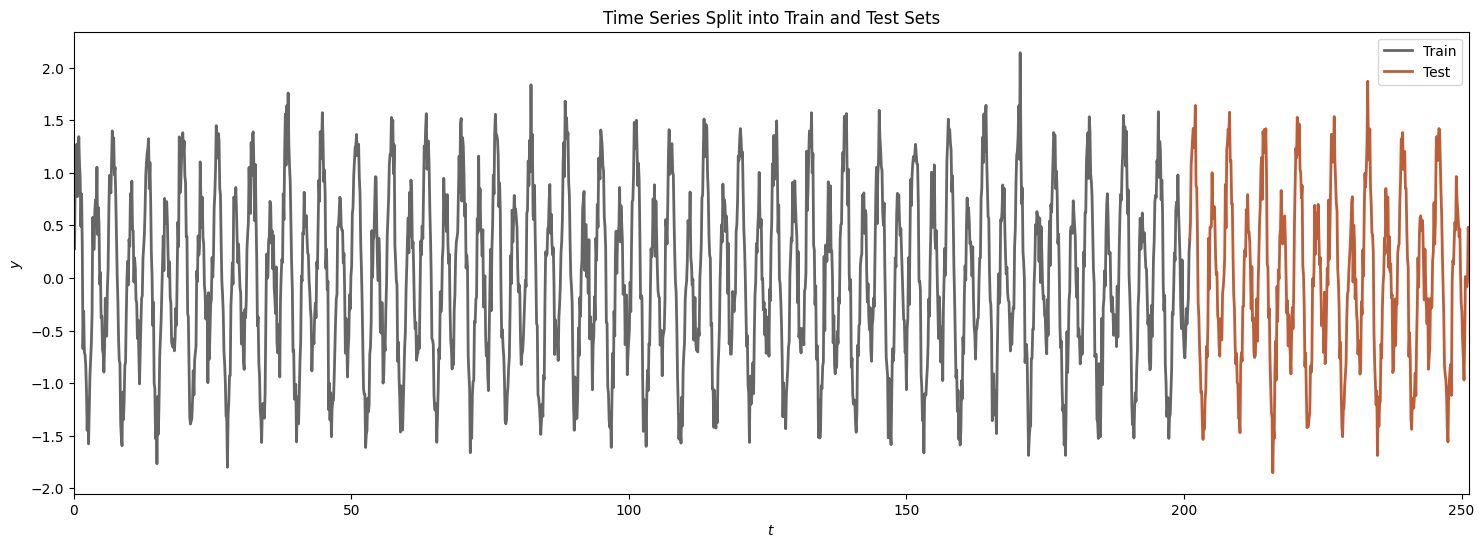

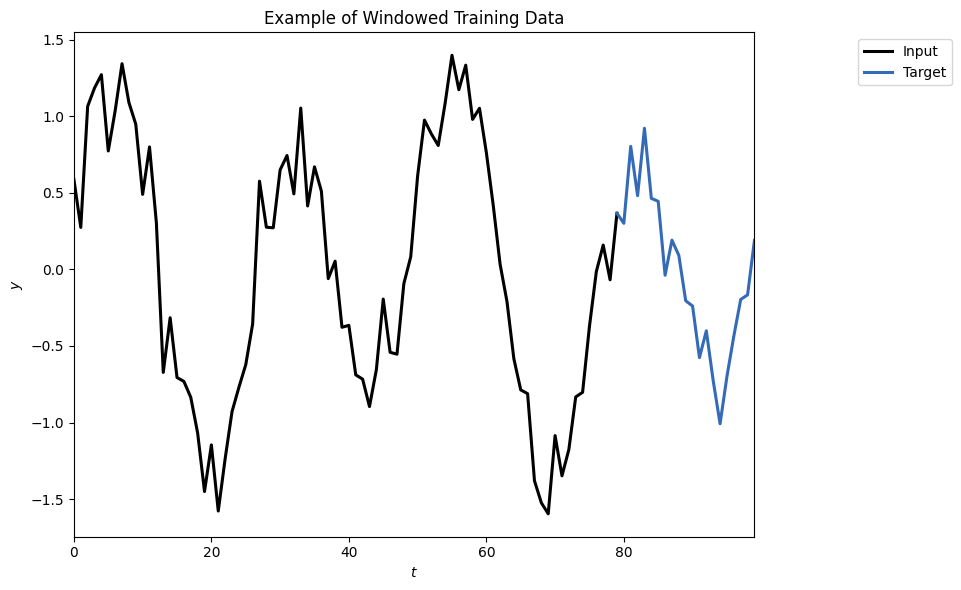

In [9]:
#----------------------------------------------------------------------------------------------------------------
# generate dataset for LSTM
t, y = generate_dataset.synthetic_data()
t_train, y_train, t_test, y_test = generate_dataset.train_test_split(t, y, split = 0.8)

# plot time series
plt.figure(figsize = (18, 6))
plt.plot(t, y, color = 'k', linewidth = 2)
plt.xlim([t[0], t[-1]])
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('Synthetic Time Series')
#plt.savefig('plots/synthetic_time_series.png')

# plot time series with train/test split
plt.figure(figsize = (18, 6))
plt.plot(t_train, y_train, color = '0.4', linewidth = 2, label = 'Train')
plt.plot(np.concatenate([[t_train[-1]], t_test]), np.concatenate([[y_train[-1]], y_test]),
         color = (0.74, 0.37, 0.22), linewidth = 2, label = 'Test')
plt.xlim([t[0], t[-1]])
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.title('Time Series Split into Train and Test Sets')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout
plt.savefig('train_test_split.png')

#----------------------------------------------------------------------------------------------------------------
# window dataset

# set size of input/output windows
iw = 80
ow = 20
s = 5

# generate windowed training/test datasets
Xtrain, Ytrain= generate_dataset.windowed_dataset(y_train, input_window = iw, output_window = ow, stride = s)
Xtest, Ytest = generate_dataset.windowed_dataset(y_test, input_window = iw, output_window = ow, stride = s)

# plot example of windowed data
plt.figure(figsize = (10, 6))
plt.plot(np.arange(0, iw), Xtrain[:, 0, 0], 'k', linewidth = 2.2, label = 'Input')
plt.plot(np.arange(iw - 1, iw + ow), np.concatenate([[Xtrain[-1, 0, 0]], Ytrain[:, 0, 0]]),
         color = (0.2, 0.42, 0.72), linewidth = 2.2, label = 'Target')
plt.xlim([0, iw + ow - 1])
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.title('Example of Windowed Training Data')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.savefig('windowed_data.png')



100%|██████████| 50/50 [01:15<00:00,  1.50s/it, loss=0.048]


FileNotFoundError: [Errno 2] No such file or directory: 'plots/predictions.png'

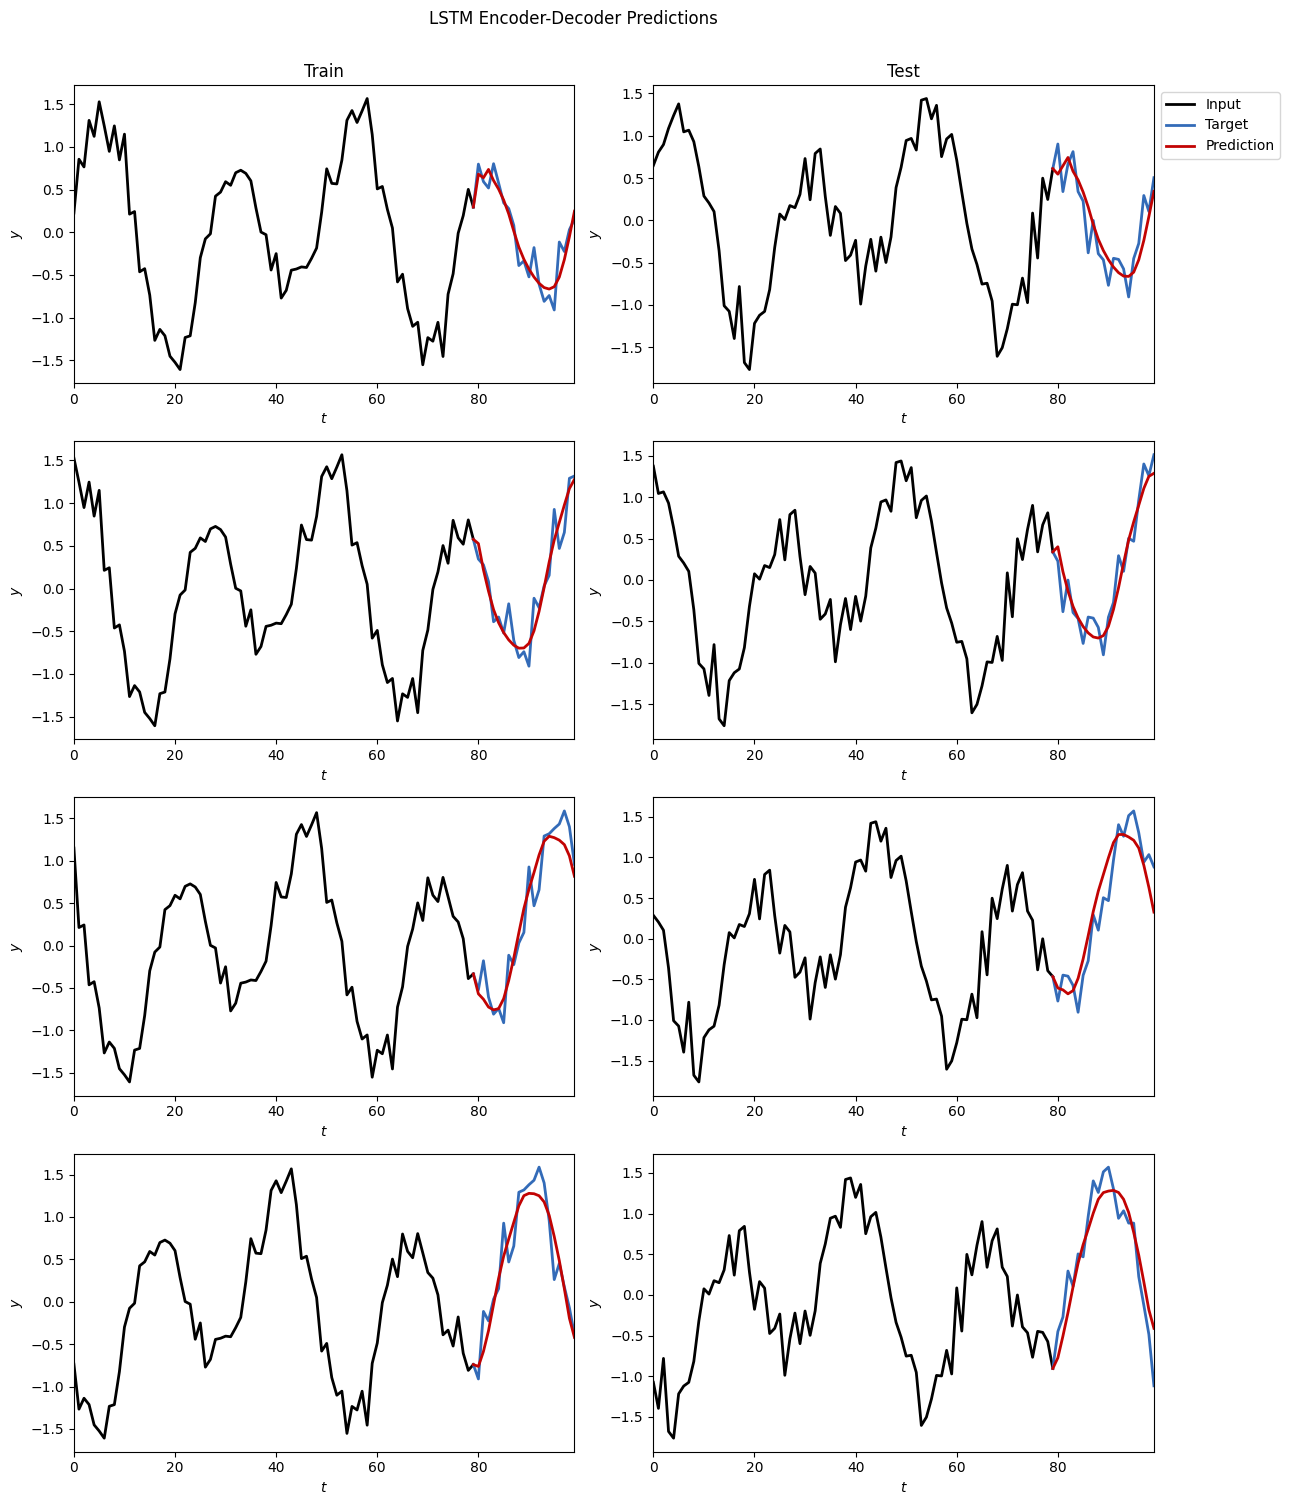

In [8]:
#----------------------------------------------------------------------------------------------------------------
# LSTM encoder-decoder

# convert windowed data from np.array to PyTorch tensor
X_train, Y_train, X_test, Y_test = generate_dataset.numpy_to_torch(Xtrain, Ytrain, Xtest, Ytest)

# specify model parameters and train
model = lstm_encoder_decoder.lstm_seq2seq(input_size = X_train.shape[2], hidden_size = 15)
loss = model.train_model(X_train, Y_train, n_epochs = 50, target_len = ow, batch_size = 5, training_prediction = 'mixed_teacher_forcing', teacher_forcing_ratio = 0.6, learning_rate = 0.01, dynamic_tf = False)

# plot predictions on train/test data
plotting.plot_train_test_results(model, Xtrain, Ytrain, Xtest, Ytest)

plt.close('all')